# A Simple Numerical Simulation of Lindblad Equation

## Course: Numerical Computation and Simulation in Physics, by Dr. Naeimabadi, Fall 2022-2023

### Mat the Cat
---

### Introduction:

In our quantum mechanics course, we have mostly studied **pure states** described by a **wavefunction**, and their dynamics and time evolution described by the **Schrodinger equation**. But in reality we are mostly faced with **mixed states**. It is a more general form of a pure state, so when the preparation of the system is not fully known and it could be a statistical ensemble of pure states or include entangled states, we treat the state of the system as a mixed state of multiple possible pure states, each with their own probability.

A mixed state is described by a **density operator** which is a generalization of the wavefunction and can be depicted as $$\rho = \sum_{j}{p_{j} | \psi_j \rangle \langle \psi_j |}$$ where $| \psi_j \rangle$ is a pure state in the ensemble with the probablity $p_j$.

If we conduct a measurement shown by the POVM $M$, using the Born trace rule we can calculate the probablity of the measurement outcome $\omega$ as: $$P_{\omega} = tr(\rho M(\omega)).$$

Just as the Scrodinger equation describes the dynamics of a pure state, the dynamics of a mixed state can be described by **Von Neumann equation** which is the quantum analogue of Liouville equation, and the Schrodinger equation is a special case of it: $$\dot{\rho} = -i[H, \rho]$$

But this equation only works for **closed systems**; which are systems that do not interact with the environment. But again in reality, it is nearly impossible to reduce the environmental noise to the extent that it can be treated as a completely isolated system. That's why we need to study **open quantum systems** and the non-unitary time evolution of quantum systems more throughly.

In general, a differential equation that is used to describe the time evolution of an open system is called a **master equation**. The most general and exact master equation currently used is *Nakajima–Zwanzig equation*, but it is very dificult to solve. So conditions and approximations are introduced to formulate more solvable master equations. One of the most popular ones is **Lindblad equation**, which describes the dynamics of a Markovian and time-homogeneous system. It is depicted as $$\dot{\rho} = - i [H, \rho] + \sum_{n=1}^{N^2 - 1}{h_{n}(L_n \rho L_n^{\dagger} - \frac{1}{2}\{ L_n^{\dagger} L_n, \rho \})}.$$ The operators $L_n$ are called **jump operators** and show the effect of noise on the system by altering the eigenvalues of our system's operators. $h$ is a coefficient that determines the system dynamics, for example decay rate.

---

### Description:

In this project, I will try to solve this equation for a simple open system consisting of 2 two-level systems coupled to each other, called $s_1$ and $s_2$; each having their ground state ($|g\rangle$) and an excited state ($|e\rangle$) and an energy level of $\Omega$. The dynamics of this system includes population transfer and changes in coherence between $s_1$ and $s_2$. We can write its hamiltonian as $$H = H_1 + H_2 + H_{12} = \frac{\Omega}{2}\sigma_z^{(1)} + \frac{\Omega}{2}\sigma_z^{(2)} + J(\sigma_{+}^{(1)} \sigma_{-}^{(2)} + \sigma_{+}^{(2)} \sigma_{-}^{(1)}).$$ Here, $J$ is the coupling coefficient, $\sigma_z^{(k)} = |e_k\rangle \langle e_k | - |g_k\rangle \langle g_k |$  is the population inversion operator, and $\sigma_{+}^{(k)} = |e_k\rangle \langle g_k |$ and $\sigma_{-}^{(k)} = |g_k\rangle \langle e_k |$ are creation and annihilation operators.

Hence the Markovian noise would be introduced as $$\dot{\rho} = -i[H, \rho] + \sum_{k=1}^{2}{\frac{\gamma}{4}(\sigma_{z}^{(k)}\rho \sigma_{z}^{(k)} - \frac{1}{2} \{ (\sigma_{z}^{(k)})^{2}, \rho\})}$$ where $\gamma$ is the dephasing rate.

For this problem, I have assumed that at time $t=0$, $s_1$ is excited and $s_2$ is at its ground state; thus $\rho (0) = |e_1 , g_2 \rangle \langle e_1 , g_2 |$, and that $J=10$. Assuming that the population of $s_1$ is defined as $P_1 (t) = \sum_{j=e,g}{\langle e_1, j_2 | \rho | e_1, j_2 \rangle}$ (same for $s_2$) and the coherence between $s_1$ and $s_2$ as $ C_{12} = \langle e_1, g_2 | \rho | g_1, e_2 \rangle$, I am going to calculate the dynamics (the evolution of population and coherence) of the system if:

* There is no noise and the system is isolated ($\gamma = 0$).
* There is Markovian noise as $\gamma \in \{ 1, 10, 100, 1000\}$.

**Note 1:** The number of excitations within the system is conserved under Markovian noise.

**Note 2:** Since both the systems have the same energy lever $\Omega$, the value of $\Omega$ doesn't affect the time evolution of $\rho$.

---

### Approach:

Based on note 1 above, I simplify the hamiltonian and the noise operators as: $$H = \Omega |1 \rangle \langle 1| + \Omega |2 \rangle \langle 2| + J(|1 \rangle \langle 2| + |2 \rangle \langle 1|)$$ $$\dot{\rho} = -i[H, \rho] + \sum_{k=1}^{2}{\gamma(|k \rangle \langle k| \rho |k \rangle \langle k| - \frac{1}{2}\{ |k \rangle \langle k|, \rho\})}$$ where $|1\rangle = |e_1, g_2\rangle$ and $|2\rangle = |e_2, g_1\rangle$.

I have chosen the **Runge-Kutta** 4th order method (RK4) to perform the comopuatations, because it is acceptably accurate and efficient, can be used to solve non-linear ODEs, and is relatively easy to implement.

**Reminder:**

$$f(t, y) = \frac{dy}{dt}$$ $$y(t_0) = y_0$$

$$k_1 = f(t_n, y_n)$$ $$k_2 = f(t_n + \frac{dt}{2}, y_n + dt\frac{k_1}{2})$$ $$k_3 = f(t_n + \frac{dt}{2}, y_n + dt\frac{k_2}{2})$$ $$k_4 = f(t_n + dt, y_n + dtk_3)$$

$$y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)dt$$ $$t_{n+1} = t_n + dt$$

---

### Code:

In [1]:
#first lets import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#define runge-kutta algorithm
#I save each y_n and t_n in an array to plot them later
def RK4(f, y0, t0, t, dt):
    tsol = np.arange(t0, t+dt, dt) #divide the time range into n intervals of length dt (n=(t-t0)/dt = len(tsol))
    ysol = np.zeros((len(tsol), len(y0), len(y0)), dtype=complex)
    ysol[0] = y0

    for i in range(1, len(tsol)):
        k1 = f(ysol[i-1], tsol[i-1])
        k2 = f(ysol[i-1] + 0.5*k1*dt, tsol[i-1] + 0.5*dt)
        k3 = f(ysol[i-1] + 0.5*k2*dt, tsol[i-1] + 0.5*dt)
        k4 = f(ysol[i-1] + k3*dt, tsol[i-1] + dt)
        ysol[i] = ysol[i-1] + 1/6*(k1 + 2*k2 + 2*k3 + k4)*dt
    
    return (tsol, ysol)

In [3]:
def p1(rho): #define population of s1
    return np.real(rho[:,0,0] + rho[:,1,1])
def p2(rho): #define population of s2
    return np.real(rho[:,2,2] + rho[:,3,3])
def c12(rho): #define coherence
    real = np.real(rho[:,1,2])
    imag = np.imag(rho[:,1,2])
    c12 = (real,imag)    
    return c12

In [4]:
#the simplified operators:
sz = np.array([[1,0],[0,-1]])
sp = np.array([[0,1],[0,0]])
sm = np.array([[0,0],[1,0]])
#identity:
idc = np.eye(2)

In [5]:
#we know that:
J = 10
Omega = 1 #take an arbitrary Omega, since it doesn't affect the dynamics
rho_0 = np.array(
[[0,0,0,0],
 [0,1,0,0],
 [0,0,0,0],
 [0,0,0,0]], dtype=complex)

In [6]:
#the hamiltonian:
H = 0.5 * Omega * (np.kron(sz, idc) + np.kron(idc, sz)) + J * (np.kron(sp, sm) + np.kron(sm, sp))
H

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0.],
       [ 0., 10.,  0.,  0.],
       [ 0.,  0.,  0., -1.]])

---

**Closed system:**

In [7]:
gamma = 0 #no noise

In [8]:
#the von neumann equation (the f = dy/dt in RK4):
def V(rho, t=None):
    return -1j * (H @ rho - rho @ H)

In [9]:
#perform RK4 up to t=1, with dt=0.001
(t0, rho0) = RK4(V, rho_0, 0, 1, 0.001)

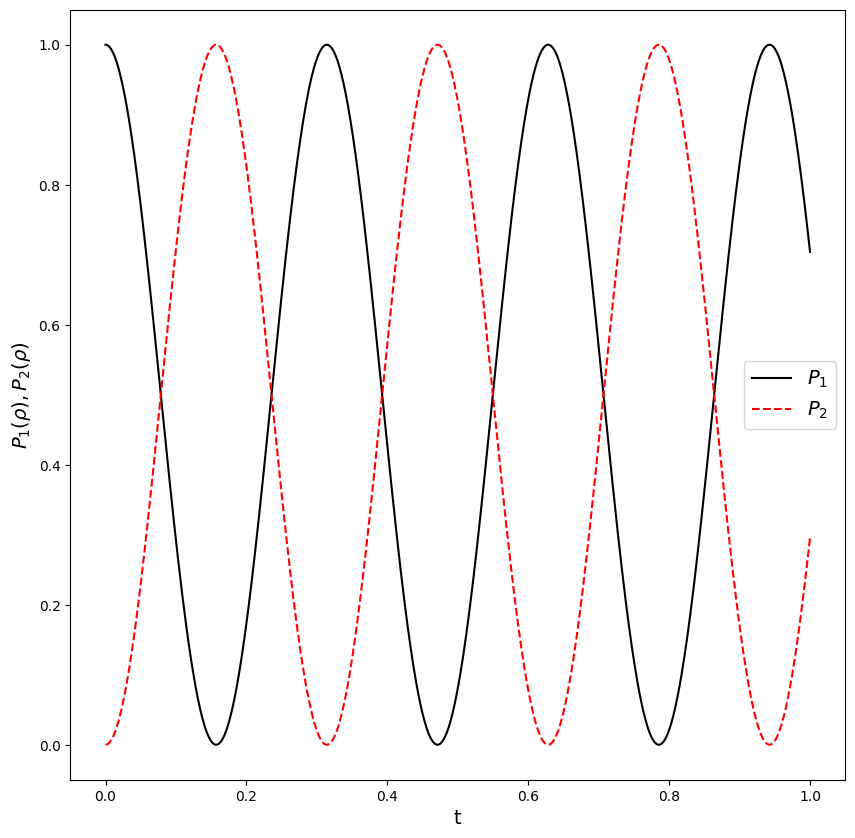

In [10]:
#lets plot the populations
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t0, p1(rho0), 'k-', label=r'$P_1$');
ax.plot(t0, p2(rho0), 'r--', label=r'$P_2$');
ax.legend(loc=0, fontsize=14);
ax.set_ylabel(r'$P_1(\rho),  P_2(\rho)$', fontsize=14);
ax.set_xlabel(r't', fontsize=14);

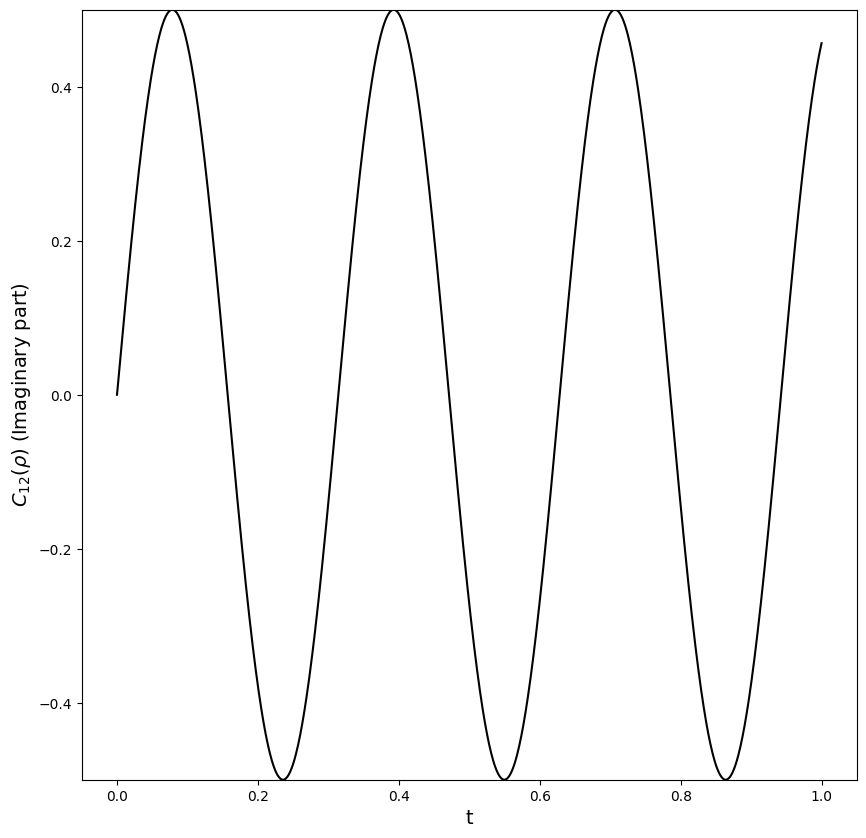

In [11]:
#and now coherence
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t0, c12(rho0)[1], 'k-', label=r'$C_{12}$'); #the real part of coherence is obviously zero because it corresponds to the classical part
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$C_{12}(\rho)$ (Imaginary part)', fontsize=14)
ax.set_ybound(-0.5,0.5)

---

**Open system:**

In [12]:
gamma = np.array([1,10,100,1000]) #4 different levels of noise

In [13]:
#the lindblad equation (the f = dy/dt in RK4):
def L(rho, t=None):
    v = V(rho, t) #the von neumann part
    l = g * (np.kron(sz,idc) @ rho @ np.kron(sz,idc) - rho) #the lindbladian part
    l += g * (np.kron(idc,sz) @ rho @ np.kron(idc,sz) - rho)
    return v + l/4

In [14]:
#perform RK4 up to t=1, with dt=0.001
g = 1
(t1, rho1) = RK4(L, rho_0, 0, 1, 0.001)
g = 10
(t10, rho10) = RK4(L, rho_0, 0, 1, 0.001)
g = 100
(t100, rho100) = RK4(L, rho_0, 0, 1, 0.001)
g = 1000
(t1000, rho1000) = RK4(L, rho_0, 0, 1, 0.001)

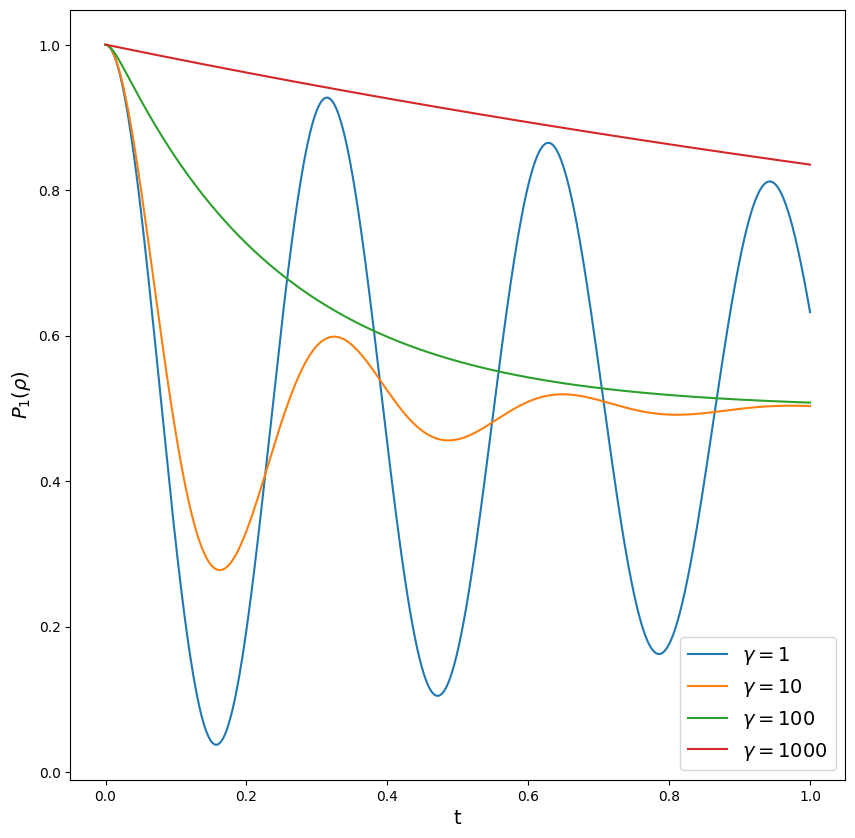

In [15]:
#plotting the populations of the first site:
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t1, p1(rho1), label=r'$\gamma=1$');
ax.plot(t10, p1(rho10), label=r'$\gamma=10$');
ax.plot(t100, p1(rho100), label=r'$\gamma=100$');
ax.plot(t1000, p1(rho1000), label=r'$\gamma=1000$');
ax.legend(loc=0, fontsize=14);
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$P_1(\rho)$', fontsize=14);

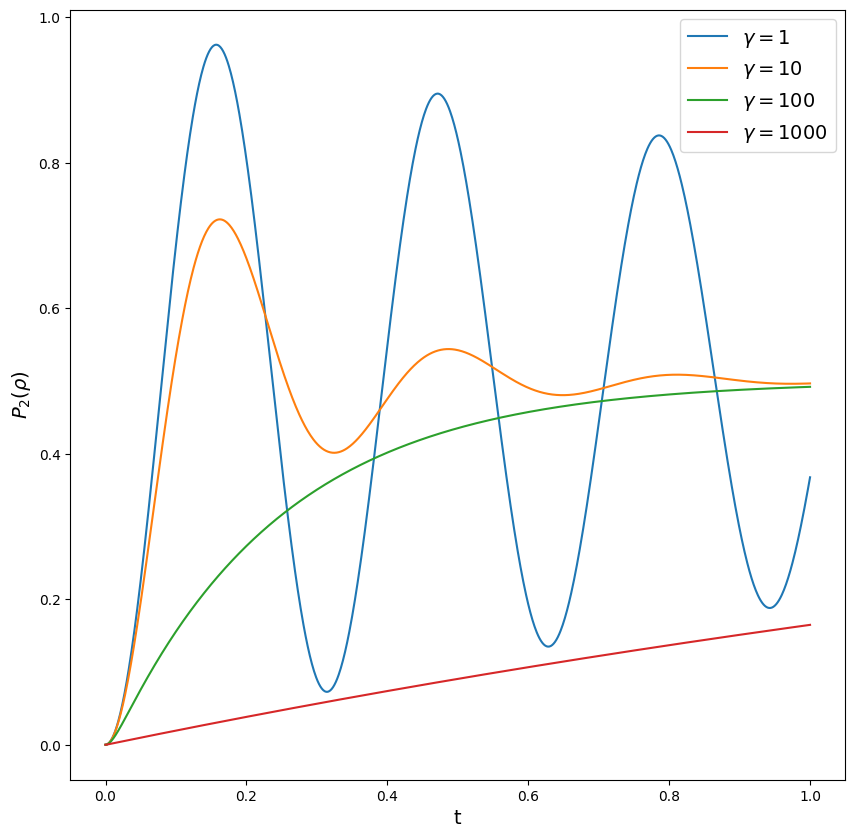

In [16]:
#plotting the populations of the second site:
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t1, p2(rho1), label=r'$\gamma=1$');
ax.plot(t10, p2(rho10), label=r'$\gamma=10$');
ax.plot(t100, p2(rho100), label=r'$\gamma=100$');
ax.plot(t1000, p2(rho1000), label=r'$\gamma=1000$');
ax.legend(loc=0, fontsize=14);
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$P_2(\rho)$', fontsize=14);

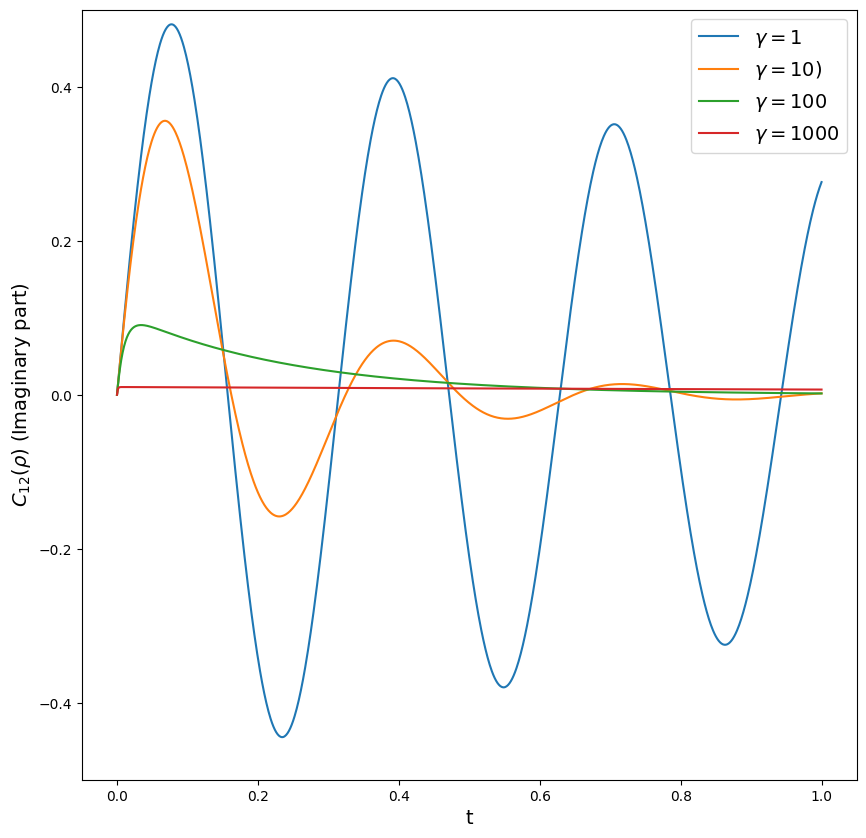

In [17]:
#plotting coherence:
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t1, c12(rho1)[1], label=r'$\gamma=1$');
ax.plot(t10, c12(rho10)[1], label=r'$\gamma=10)$');
ax.plot(t100, c12(rho100)[1], label=r'$\gamma=100$');
ax.plot(t1000, c12(rho1000)[1], label=r'$\gamma=1000$');
ax.legend(loc=0, fontsize=14);
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$C_{12}(\rho)$ (Imaginary part)', fontsize=14)
ax.set_ybound(-.5,.5)

---

### Conclusion:

Using the Runge-Kutta 4th order method, I arrived at the time evolution of the dynamics of this simple system  with and without the presence of noise by solving two linear first-order differential equations. The code takes a negligible memory and running time. The computation workload of this method is mainly the matrix multiplications and depends on the size of the system ($N^2$).

One of the issues with this algorithm is its stability. Small errors could cause the trace of the density operator to slightly deviate from 1, and in long computations, the slight deviations can accumulate and grow. For such problems, we can use algorithms that preserve the trace, with the cost of more computation time/power.

In a closed system, we can see from the diagrams that the population of both sites keep oscillating about $0.5$ with a constant average, meaning that the single conserved excitation within the system is periodically shifted from the first site to the second. The coherence also oscillates regularly about zero, from $-0.5$ to $0.5$.

In a closed system, the average population of both sites are reduced with time, but the rate of this reduction doesn't seem to have a strong dependence on the strength of the noise. However, higher noise reduces the oscillatory property of the populations and the population drops without oscillating with high noise levels.

Also as expected, the coherence is damped with the presence of noise, and the stronger the dephasing rate is, the faster the coherence drops to zero.

---

### References:

*Analyzing the positivity preservation of numerical methods for the Liouville-von Neumann equation*, Michael Riesch, Christian Jirauschek, 2019

*Numerical analysis of the master equation*, Ronald Dickman, 2002

*A short introduction to the Lindblad master equation*, Daniel Manzano, 2020

*Stability of Runge-Kutta Methods*, Jason Frank, https://webspace.science.uu.nl/~frank011/Classes/numwisk/

*Simulation of Quantum Dynamics Based on the Quantum Stochastic Differential Equation*, Ming Li, 2013

*Open Quantum Systems*, Paola Cappellaro, https://ocw.mit.edu/courses/22-51-quantum-theory-of-radiation-interactions-fall-2012/